# First Keras Notebook

An attempt to recreate the network in tests.ipynb except sorting by tag so we have 3 less possible outputs, and including a no-tag option

In [1]:
from ptetaphi_nn import PtEtaPhiNN
import tools

filename = 'user.jagrundy.20736236._000001.MiniNTuple.root'

Using TensorFlow backend.


Load ntuple, get the data we need from the file

In [2]:
s_table = tools.open_file(filename, sort_by="tag")

sorting data by tag


In [3]:
# filter by realistic situation where we have 3 tags and 3 or 4 jets.
# ignore the case where there may be >4 since those are pretty rare
nb4 = (s_table.nbjets == 3) | (s_table.nbjets == 4) # 3 or 4 b-jets exist
nt3 = s_table.nbtags==3  # 3 b tags
nb4nt3 = nb4 & nt3
events = s_table[nb4nt3]
print(len(events))

# and ensure that the 3 tags are actually correct
# this results in very little event loss
events = events[events.truth[:,0] == 1]
events = events[events.truth[:,1] == 1]
events = events[events.truth[:,2] == 1]
print(len(events))

308955
303925


cutoff and pad for nn compatibility

In [4]:
cutoff = 10  # not many events have >10 jets
# "pad" = ensure all events have same length, cut off ends if needed
events = tools.pad(events, cutoff)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 21)                462       
_________________________________________________________________
dense_2 (Dense)              (None, 21)                462       
_________________________________________________________________
dense_3 (Dense)              (None, 15)                330       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 128       
Total params: 1,382
Trainable params: 1,382
Non-trainable params: 0
_________________________________________________________________
Train on 212747 samples, validate on 30393 samples
Epoch 1/200
212747/212747 [==============================] - 1s 7us/step - loss: 1.8438 - acc: 0.4274 - val_loss: 1.3928 - val_acc: 0.4377
Epoch 2/200
212747/212747 [==============================] -

Epoch 53/200
212747/212747 [==============================] - 1s 6us/step - loss: 1.0714 - acc: 0.5130 - val_loss: 1.0719 - val_acc: 0.5123
Epoch 54/200
212747/212747 [==============================] - 1s 6us/step - loss: 1.0710 - acc: 0.5128 - val_loss: 1.0713 - val_acc: 0.5127
Epoch 55/200
212747/212747 [==============================] - 1s 6us/step - loss: 1.0705 - acc: 0.5133 - val_loss: 1.0708 - val_acc: 0.5132
Epoch 56/200
212747/212747 [==============================] - 1s 6us/step - loss: 1.0700 - acc: 0.5134 - val_loss: 1.0704 - val_acc: 0.5129
Epoch 57/200
212747/212747 [==============================] - 1s 6us/step - loss: 1.0696 - acc: 0.5133 - val_loss: 1.0697 - val_acc: 0.5134
Epoch 58/200
212747/212747 [==============================] - 1s 6us/step - loss: 1.0691 - acc: 0.5137 - val_loss: 1.0693 - val_acc: 0.5133
Epoch 59/200
212747/212747 [==============================] - 1s 6us/step - loss: 1.0686 - acc: 0.5141 - val_loss: 1.0689 - val_acc: 0.5138
Epoch 60/200
212747/

212747/212747 [==============================] - 1s 6us/step - loss: 1.0543 - acc: 0.5178 - val_loss: 1.0543 - val_acc: 0.5181
Epoch 112/200
212747/212747 [==============================] - 1s 6us/step - loss: 1.0542 - acc: 0.5178 - val_loss: 1.0539 - val_acc: 0.5190
Epoch 113/200
212747/212747 [==============================] - 1s 6us/step - loss: 1.0541 - acc: 0.5177 - val_loss: 1.0539 - val_acc: 0.5191
Epoch 114/200
212747/212747 [==============================] - 1s 6us/step - loss: 1.0540 - acc: 0.5179 - val_loss: 1.0537 - val_acc: 0.5190
Epoch 115/200
212747/212747 [==============================] - 1s 6us/step - loss: 1.0538 - acc: 0.5180 - val_loss: 1.0535 - val_acc: 0.5192
Epoch 116/200
212747/212747 [==============================] - 1s 6us/step - loss: 1.0537 - acc: 0.5179 - val_loss: 1.0537 - val_acc: 0.5193
Epoch 117/200
212747/212747 [==============================] - 1s 6us/step - loss: 1.0536 - acc: 0.5183 - val_loss: 1.0534 - val_acc: 0.5198
Epoch 118/200
212747/212747

212747/212747 [==============================] - 1s 6us/step - loss: 1.0488 - acc: 0.5201 - val_loss: 1.0500 - val_acc: 0.5209
Epoch 170/200
212747/212747 [==============================] - 1s 6us/step - loss: 1.0488 - acc: 0.5199 - val_loss: 1.0497 - val_acc: 0.5210
Epoch 171/200
212747/212747 [==============================] - 1s 7us/step - loss: 1.0487 - acc: 0.5202 - val_loss: 1.0496 - val_acc: 0.5204
Epoch 172/200
212747/212747 [==============================] - 1s 7us/step - loss: 1.0487 - acc: 0.5197 - val_loss: 1.0496 - val_acc: 0.5206
Epoch 173/200
212747/212747 [==============================] - 1s 6us/step - loss: 1.0486 - acc: 0.5198 - val_loss: 1.0496 - val_acc: 0.5206
Epoch 174/200
212747/212747 [==============================] - 1s 6us/step - loss: 1.0485 - acc: 0.5199 - val_loss: 1.0495 - val_acc: 0.5206
Epoch 175/200
212747/212747 [==============================] - 1s 6us/step - loss: 1.0485 - acc: 0.5199 - val_loss: 1.0495 - val_acc: 0.5211
Epoch 176/200
212747/212747

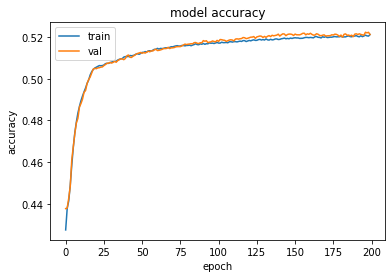

In [5]:
nn = PtEtaPhiNN(events)
nn.learn()

using data given when this model was created


100%|██████████| 60785/60785 [00:00<00:00, 148010.51it/s]


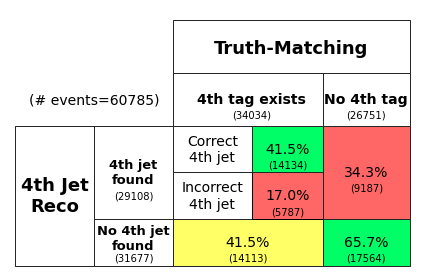

In [7]:
nn.evaluate(savename="first_nn")